# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요  
쭉 실행시켜주시고, 데이터 스케일링 빈칸은 채워주세요!

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

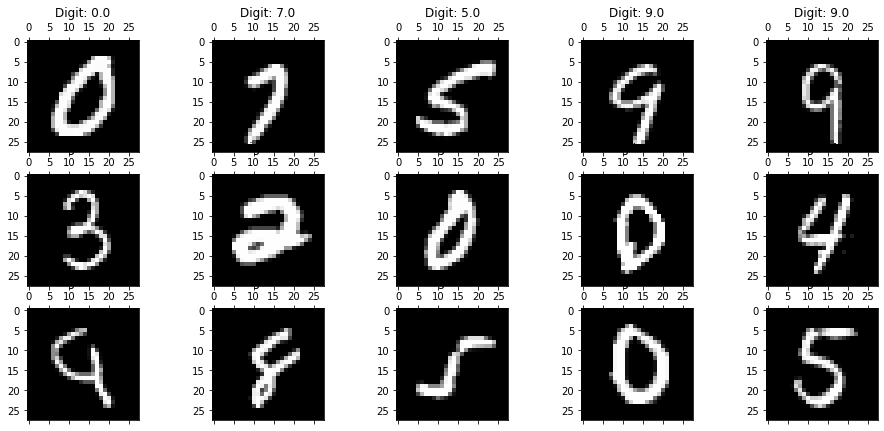

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) 스케일링 해주세요

In [9]:
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


* Colum별로 분산, 최대값 차이가 크기 때문에 scaling 필요함.

In [19]:
# 1. StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pd.DataFrame(X_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.505890e-15,1.453746e-14,-7.124798e-15,-4.374180e-15,-3.585666e-15,1.551189e-15,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.236282e+01,5.965323e+01,9.086908e+01,1.619808e+02,1.634635e+02,1.932091e+02,0.0,0.0,0.0,0.0


* `StandardScaler`는 음수값이 나오기 때문에 적절하지 않음.

In [20]:
# 2. MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_mms = scaler.fit_transform(X)
pd.DataFrame(X_mms).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000777,0.000392,0.000184,0.000066,0.000051,0.000028,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023587,0.016757,0.011003,0.006173,0.006117,0.005176,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


`MinMaxScaler`는 최댓값을 1로 변환하기 때문에 왜곡이 생길 우려가 있음.

In [21]:
# 이미지 데이터 스케일링 시, 타겟값은 음수를 포함하지 않아야 합니다!
# 왜곡이 생길 우려가 있는 스케일링도 지양해주세요
scaled_X = X / 255
pd.DataFrame(scaled_X).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


### 2) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할해주세요

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.2, random_state=0)

In [24]:
print(f"shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}\n")

shape of X_train : (56000, 784)
shape of X_test : (14000, 784)
shape of y_train : (56000, 1)
shape of y_test : (14000, 1)



### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 3) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주세요!<br>
scree plot을 직접 그려서 확인해주세요!

In [25]:
from sklearn.decomposition import PCA

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### PCA

### 누적설명률이 70% ~ 80%인 지점

In [28]:
variance_ratio = {}

for i in range(80, 200):
    if(i%10==0):
        print(i)
    pca = PCA(n_components=i)
    pca.fit(X_train)
    variance_ratio['_'.join(['n', str(i)])] = pca.explained_variance_ratio_.sum()

80
90
100
110
120
130
140
150
160
170
180
190


In [29]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [31]:
variance_ratio = []
ratio = 0
for i in np.sort(pca.explained_variance_ratio_)[::-1]:
    ratio += i
    variance_ratio.append(ratio)

In [54]:
for value in [0.7, 0.8, 0.9]:
    pca = PCA(n_components=value, svd_solver='full')
    X_pca = pca.fit_transform(X_train)
    exp_var_ratio = pca.explained_variance_
    print(len(exp_var_ratio))

26
43
87


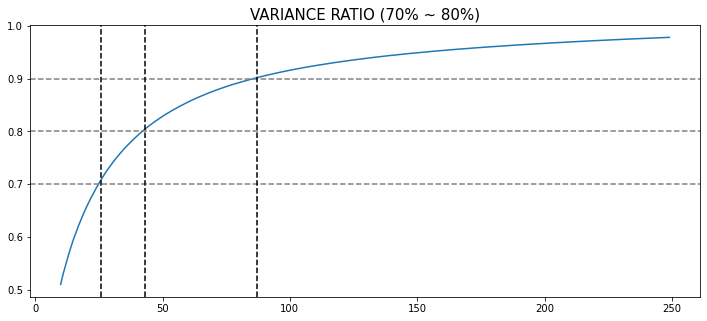

In [55]:
# 누적 설명 비중 그래프

plt.figure(figsize=(12,5))

plt.plot(list(range(10, 250)), variance_ratio[10:250])

plt.axhline(0.7, color='gray', ls='--')
plt.axhline(0.8, color='gray', ls='--')
plt.axhline(0.9, color='gray', ls='--')

plt.axvline(26, color='black', ls='--')
plt.axvline(43, color='black', ls='--')
plt.axvline(87, color='black', ls='--')

plt.title('VARIANCE RATIO (70% ~ 80%)', size=15)
plt.show()

* 26개의 주성분을 선택하면 누적 설명률이 70% 정도, 43개의 주성분을 선택하면 누적 설명률이 80% 정도, 87개의 주성분을 선택하면 누적설명률이 90%이상 됨.

### Scree plot

In [50]:
#pip install kneed

In [51]:
from kneed import KneeLocator

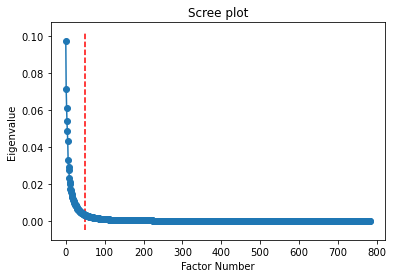

In [52]:
exp_var_ratio = pca.explained_variance_ratio_

plt.plot(range(len(exp_var_ratio)), exp_var_ratio, marker='o')
plt.title('Scree plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')

kn = KneeLocator(range(len(exp_var_ratio)), exp_var_ratio, curve = 'convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')

plt.show()

In [53]:
print('Elbow Point : ', kn.knee)

Elbow Point :  49


### LDA

In [62]:
# LDA는 지도학습이기에 fit할 때 target(y_train)도 함께 학습 시켜야 함.
# 학습 시 y_train은 1D array 형태로 입력 - numpy ravel 매서드 활용

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [64]:
# 각 성분별 설명 비중
exp_var_ratio = lda.explained_variance_ratio_

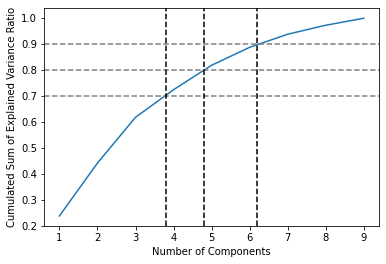

In [71]:
# 누적 설명 비중 그래프

# 누적 설명 비중
exp_var_ratio_cumsum = np.cumsum(exp_var_ratio)

plt.plot(list(range(1, 1+len(exp_var_ratio_cumsum))), exp_var_ratio_cumsum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulated Sum of Explained Variance Ratio')

plt.axhline(0.7, color='gray', ls='--')
plt.axhline(0.8, color='gray', ls='--')
plt.axhline(0.9, color='gray', ls='--')

plt.axvline(3.8, color='black', ls='--')
plt.axvline(4.8, color='black', ls='--')
plt.axvline(6.2, color='black', ls='--')


plt.show()

* 약 4개의 주성분을 선택하면 누적 설명률이 70% 정도, 약 5개의 주성분을 선택하면 누적 설명률이 80% 정도, 약 6개의 주성분을 선택하면 누적설명률이 90%이상 됨.

### 주성분 개수 최종 결정

* **PCA : 50개** 

    * 26개의 주성분을 선택하면 누적 설명률이 70% 정도, 43개의 주성분을 선택하면 누적 설명률이 80% 정도, 87개의 주성분을 선택하면 누적설명률이 90%이상 됨.
    
    * Scree plot에서의 elbow point는 factor number가 49임.
    
    * 따라서 50개를 선택하고자 함.
    
    
* **LDA : 5개** 

    * 약 4개의 주성분을 선택하면 누적 설명률이 70% 정도, 약 5개의 주성분을 선택하면 누적 설명률이 80% 정도, 약 6개의 주성분을 선택하면 누적설명률이 90%이상 됨.
    
    * 따라서 5개를 선택하고자 함.

In [77]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [80]:
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

### 4) Modeling

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import time
import warnings
warnings.filterwarnings('ignore')

### Random Forest

**original data**

In [75]:
rf_clf = RandomForestClassifier(random_state=0)
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()
print(f'time > {end-start}')

time > 25.897905349731445


In [76]:
pred = rf_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9699285714285715


**PCA data**

In [78]:
rf_clf = RandomForestClassifier(random_state=0)
start = time.time()
rf_clf.fit(X_train_pca, y_train)
end = time.time()
print(f'time > {end-start}')

time > 35.653817653656006


In [79]:
pred = rf_clf.predict(X_test_pca)
print(accuracy_score(pred, y_test))

0.9550714285714286


**lda data**

In [81]:
rf_clf = RandomForestClassifier(random_state=0)
start = time.time()
rf_clf.fit(X_train_lda, y_train)
end = time.time()
print(f'time > {end-start}')

time > 10.212919473648071


In [82]:
pred = rf_clf.predict(X_test_lda)
print(accuracy_score(pred, y_test))

0.8452142857142857


* 원본 데이터와 PCA 데이터 간의 accuracy 차이는 크지 않음.
* PCA가 lda보다 accuracy가 높음.

### Logistic Regression

**original data**

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr_clf = LogisticRegression(random_state=0)

In [85]:
start = time.time()
lr_clf.fit(X_train, y_train)
end = time.time()
print(f'time > {end-start}')

time > 5.748458385467529


In [86]:
pred = lr_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9255


In [87]:
param = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(lr_clf, param, cv=5, scoring='accuracy', verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START C=0.001.....................................................
[CV 1/5; 1/7] END ......................C=0.001;, score=0.888 total time=   4.6s
[CV 2/5; 1/7] START C=0.001.....................................................
[CV 2/5; 1/7] END ......................C=0.001;, score=0.893 total time=   4.6s
[CV 3/5; 1/7] START C=0.001.....................................................
[CV 3/5; 1/7] END ......................C=0.001;, score=0.889 total time=   4.8s
[CV 4/5; 1/7] START C=0.001.....................................................
[CV 4/5; 1/7] END ......................C=0.001;, score=0.889 total time=   5.1s
[CV 5/5; 1/7] START C=0.001.....................................................
[CV 5/5; 1/7] END ......................C=0.001;, score=0.887 total time=   4.8s
[CV 1/5; 2/7] START C=0.01......................................................
[CV 1/5; 2/7] END .......................C=0.01;,

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=10)

In [88]:
grid.best_score_

0.9203214285714285

**PCA data**

In [93]:
start = time.time()
lr_clf.fit(X_train_pca, y_train)
end = time.time()
print(f'time > {end-start}')

time > 2.7610135078430176


In [94]:
pred = lr_clf.predict(X_test_pca)
print(accuracy_score(pred, y_test))

0.9096428571428572


In [99]:
param = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(lr_clf, param, cv=5, scoring='accuracy', verbose=10)
grid.fit(X_train_pca, y_train)

grid.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START C=0.001.....................................................
[CV 1/5; 1/7] END ......................C=0.001;, score=0.880 total time=   0.8s
[CV 2/5; 1/7] START C=0.001.....................................................
[CV 2/5; 1/7] END ......................C=0.001;, score=0.888 total time=   0.8s
[CV 3/5; 1/7] START C=0.001.....................................................
[CV 3/5; 1/7] END ......................C=0.001;, score=0.881 total time=   0.8s
[CV 4/5; 1/7] START C=0.001.....................................................
[CV 4/5; 1/7] END ......................C=0.001;, score=0.883 total time=   0.7s
[CV 5/5; 1/7] START C=0.001.....................................................
[CV 5/5; 1/7] END ......................C=0.001;, score=0.880 total time=   0.7s
[CV 1/5; 2/7] START C=0.01......................................................
[CV 1/5; 2/7] END .......................C=0.01;,

0.9057678571428571

**lda data**

In [96]:
start = time.time()
lr_clf.fit(X_train_lda, y_train)
end = time.time()
print(f'time > {end-start}')

time > 2.502784490585327


In [97]:
pred = lr_clf.predict(X_test_lda)
print(accuracy_score(pred, y_test))

0.8272142857142857


In [100]:
param = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(lr_clf, param, cv=5, scoring='accuracy', verbose=10)
grid.fit(X_train_lda, y_train)

grid.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START C=0.001.....................................................
[CV 1/5; 1/7] END ......................C=0.001;, score=0.834 total time=   1.0s
[CV 2/5; 1/7] START C=0.001.....................................................
[CV 2/5; 1/7] END ......................C=0.001;, score=0.834 total time=   0.9s
[CV 3/5; 1/7] START C=0.001.....................................................
[CV 3/5; 1/7] END ......................C=0.001;, score=0.832 total time=   0.9s
[CV 4/5; 1/7] START C=0.001.....................................................
[CV 4/5; 1/7] END ......................C=0.001;, score=0.829 total time=   0.9s
[CV 5/5; 1/7] START C=0.001.....................................................
[CV 5/5; 1/7] END ......................C=0.001;, score=0.831 total time=   0.9s
[CV 1/5; 2/7] START C=0.01......................................................
[CV 1/5; 2/7] END .......................C=0.01;,

0.8349464285714285

* 원본 데이터와 PCA data의 accuracy 차이가 크지 않으나 Random Forest에 비해 크게 떨어짐
* PCA가 lda보다 accuracy가 높음.

### Decision Tree

**original data**

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt_clf = DecisionTreeClassifier()

In [103]:
start = time.time()
dt_clf.fit(X_train, y_train)
end = time.time()
print(f'time > {end-start}')

time > 14.817631244659424


In [104]:
pred = dt_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.8738571428571429


**PCA data**

In [105]:
start = time.time()
dt_clf.fit(X_train_pca, y_train)
end = time.time()
print(f'time > {end-start}')

time > 5.738056182861328


In [106]:
pred = dt_clf.predict(X_test_pca)
print(accuracy_score(pred, y_test))

0.8455


**lda data**

In [107]:
start = time.time()
dt_clf.fit(X_train_lda, y_train)
end = time.time()
print(f'time > {end-start}')

time > 0.43991637229919434


In [108]:
pred = dt_clf.predict(X_test_lda)
print(accuracy_score(pred, y_test))

0.7797142857142857


* PCA, lda한 경우 성능이 크게 떨어지고, Random Forest, Logistic Regression에 비해 크게 떨어짐
* PCA가 lda보다 accuracy가 높음.

### SVM

**original data**

In [109]:
from sklearn.svm import SVC

svm = SVC()

In [111]:
start = time.time()
svm.fit(X_train, y_train)
end = time.time()
print(f'time > {end-start}')

time > 156.4872851371765


In [112]:
pred = svm.predict(X_test)
print(accuracy_score(pred, y_test))

0.9800714285714286


**PCA data**

In [113]:
start = time.time()
svm.fit(X_train_pca, y_train)
end = time.time()
print(f'time > {end-start}')

time > 32.89007616043091


In [114]:
pred = svm.predict(X_test_pca)
print(accuracy_score(pred, y_test))

0.9837857142857143


**lda data**

In [115]:
start = time.time()
svm.fit(X_train_lda, y_train)
end = time.time()
print(f'time > {end-start}')

time > 19.841525554656982


In [116]:
pred = svm.predict(X_test_lda)
print(accuracy_score(pred, y_test))

0.8463571428571428


* PCA한 데이터가 원본 데이터보다 accuracy가 높게 나옴.
* 다른 방법들보다 accuracy가 높음.

### XGBoost

**original data**

In [118]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [119]:
from xgboost import XGBClassifier

In [120]:
xgb = XGBClassifier()

In [121]:
start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
print(f'time > {end-start}')

[12:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
time > 348.1046040058136


In [122]:
pred = xgb.predict(X_test)
print(accuracy_score(pred, y_test))

0.9785714285714285


**PCA data**

In [123]:
start = time.time()
xgb.fit(X_train_pca, y_train)
end = time.time()
print(f'time > {end-start}')

[12:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
time > 175.00401544570923


In [124]:
pred = xgb.predict(X_test_pca)
print(accuracy_score(pred, y_test))

0.9684285714285714


**lda data**

In [125]:
start = time.time()
xgb.fit(X_train_lda, y_train)
end = time.time()
print(f'time > {end-start}')

[13:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
time > 30.197155237197876


In [126]:
pred = xgb.predict(X_test_lda)
print(accuracy_score(pred, y_test))

0.8397857142857142


* PCA한 데이터와 원본 데이터의 accuracy는 거의 비슷하고 다른 방법들 보다 accuracy가 높은편에 속함.
* lda한 데이터는 accuracy가 많이 떨어짐.

### LightGBM

**original data**

In [128]:
#pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [129]:
from lightgbm import LGBMClassifier

In [130]:
lgbm = LGBMClassifier()

In [131]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print(f'time > {end-start}')

time > 29.666250705718994


In [132]:
pred = lgbm.predict(X_test)
print(accuracy_score(pred, y_test))

0.9775714285714285


**PCA data**

In [133]:
start = time.time()
lgbm.fit(X_train_pca, y_train)
end = time.time()
print(f'time > {end-start}')

time > 4.143030405044556


In [134]:
pred = lgbm.predict(X_test_pca)
print(accuracy_score(pred, y_test))

0.9671428571428572


**lda data**

In [135]:
start = time.time()
lgbm.fit(X_train_lda, y_train)
end = time.time()
print(f'time > {end-start}')

time > 1.0943429470062256


In [136]:
pred = lgbm.predict(X_test_lda)
print(accuracy_score(pred, y_test))

0.8413571428571428


### Summary

### 원본 데이터 Trainig 결과

* Random Forest : 25.897s / 0.969
* Logistic Regression : 5.748s / 0.925
* Decision Tree : 14.817s / 0.873
* SVM : 156.487s / 0.980
* XGBoost : 348.104s / 0.978
* LightGBM : 29.666s / 0.977


**Training 시간 (빠른 순서대로)** 

: Logistic Regression > Decision Tree > Random Forest > LightGBM > SVM > XGBoost

**Test Accuracy(높은 순서대로)**

: SVM > XGBoost > LightGBM > Random Forest > Logistic Regression > Decision Tree

### PCA 축소 데이터 Training 결과

* Random Forest : 35.653s / 0.955
* Logistic Regression : 2.761s / 0.909
* Decision Tree : 5.738s / 0.845
* SVM : 32.890s / 0.983
* XGBoost : 175.004s / 0.968
* LightGBM : 4.143s / 0.967

**Training 시간 (빠른 순서대로)** 

: Logistic Regression > LightGBM > Decision Tree > SVM > Random Forest > XGBoost

**Test Accuracy(높은 순서대로)**

: SVM > XGBoost > LightGBM > Random Forest > Logistic Regression > Decision Tree

### lda 축소 데이터 Training 결과

* Random Forest : 10.212s / 0.845
* Logistic Regression : 2.502s / 0.827
* Decision Tree : 0.439s / 0.779
* SVM : 19.841s / 0.846
* XGBoost : 30.197s / 0.839
* LightGBM : 1.094s / 0.841

**Training 시간 (빠른 순서대로)** 

: Decision Tree > LightGBM > Logistic Regression > Random Forest > SVM > XGBoost

**Test Accuracy(높은 순서대로)**

: SVM > Random Forest > LightGBM > XGBoost > Logistic Regression > Decision Tree

### Training 결과 비교

**Training 시간**
* 차원이 줄어들수록 함께 낮아짐.
* lda가 PCA보다 시간이 적게 걸림.

**Test Accuracy**
* 차원이 줄어들수록 함께 낮아지지만 PCA 축소 데이터와는 크게 차이나지 않음.
* lda의 경우는 원본 데이터와 비교해서 많이 낮아지는 경향이 있음

**최종 모델**
* Training 시간이 많이 들지 않으면서도 Test Accuracy가 높게 나오는 LightGBM을 사용하고, 차원 축소 기법은 PCA를 사용함.

In [137]:
lgbm.fit(X_train_pca, y_train)
pred = lgbm.predict(X_test_pca)
print(accuracy_score(pred, y_test))

0.9671428571428572
